[ 0.40995861  6.75529595 -1.63467478  0.88748016  0.33317242  0.26908411
  0.3167276   0.23376102  0.14800502  0.07827447]
[ 4.82411801  3.84372216  1.55590914  0.95372797  0.5266941   0.28698374
  0.17065865  0.10313304  0.06296292  0.03958201]
[  0.57475988   0.97701178   1.68047996   2.85583622   4.90546896
   8.32031464  14.08622005  23.89172262  40.56290638  68.97188196]
detection=  1.64530058695
[  2.21127568  17.34182817  -0.17794516   2.40762294   0.57827626
   0.68486431   0.94675112   0.35666289   0.37166814   0.14165933]
[ 6.88762009  5.3474504   2.17756705  1.3291697   0.73874529  0.4029756
  0.23978474  0.14579313  0.08876751  0.05587432]
[  0.57429323   0.97701178   1.68010765   2.85801446   4.90546896
   8.31974489  14.08695347  23.89125619  40.562717    68.97129042]
detection=  2.644528747
time =  1.71202516556


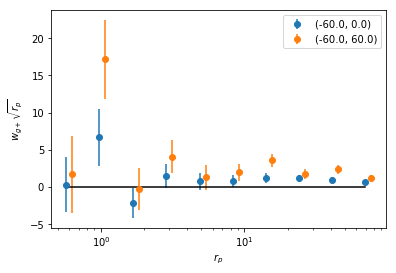

In [2]:
import time

time0=time.time()

def chi(z,omegam=0.27,H=100):
  # import cosmology
  # c0=cosmology.Cosmo(H0=H,omega_m=omegam)
  # return c0.Dc(0.,z)
  from astropy import cosmology
  from astropy.cosmology import FlatLambdaCDM
  cosmo = FlatLambdaCDM(H0=70, Om0=0.27)
  return cosmo.comoving_distance(z).value

import numpy as np

data=np.genfromtxt('L6.dat',dtype=None,names=['ra','dec','z','temp1','temp2','temp3','temp4','temp5','temp6','temp7','e1','e2','tem1','tem2','tem3','tem4','reg'])
rands=np.genfromtxt('RL6.dat',dtype=None,names=['ra','dec','z','temp1','temp2','temp3','temp4','temp5','temp6','temp7','e1','e2','tem1','tem2','tem3','tem4','reg'])

datar=chi(data['z'])
randsr=chi(rands['z'])
points=np.ones(len(datar))

tmax = 60. # tangential direction
rmin1 = -60. # radial direction
rmax1 = 0.

import treecorr

dataE=treecorr.Catalog(g1=data['e1'], g2=data['e2'], ra=data['ra'], dec=data['dec'], r=datar, ra_units='deg', dec_units='deg')
dataP=treecorr.Catalog(ra=data['ra'], dec=data['dec'], r=datar, ra_units='deg', dec_units='deg')
randP=treecorr.Catalog(ra=rands['ra'], dec=rands['dec'], r=randsr, ra_units='deg', dec_units='deg')

# correlation-1

ED1=treecorr.NGCorrelation(nbins=10, min_sep=.3/.7, max_sep=tmax/.7, bin_slop=0.01, verbose=0, min_rpar=rmin1/.7, max_rpar=rmax1/.7)
ER1=treecorr.NGCorrelation(nbins=10, min_sep=.3/.7, max_sep=tmax/.7, bin_slop=0.01, verbose=0, min_rpar=rmin1/.7, max_rpar=rmax1/.7)
RR1=treecorr.NNCorrelation(nbins=10, min_sep=.3/.7, max_sep=tmax/.7, bin_slop=0.01, verbose=0, min_rpar=rmin1/.7, max_rpar=rmax1/.7)

ED1.process(dataP,dataE,metric='Rperp')
ER1.process(randP,dataE,metric='Rperp')
RR1.process(randP,randP,metric='Rperp')

xi_gp=(ED1.xi*ED1.npairs-ER1.xi*ER1.npairs)/RR1.npairs/(2*0.87)
wgp=xi_gp*(rmax1-rmin1)
error_wgp=np.sqrt( ED1.varxi*(ED1.npairs/RR1.npairs)**2 + ER1.varxi*(ER1.npairs/RR1.npairs)**2 )*(rmax1-rmin1)/(2*0.87)
detection=np.sqrt( sum((wgp/error_wgp)**2) /9 )

print wgp
print error_wgp
print ED1.meanr
print 'detection= ',detection

np.savetxt('pycorr.out',(wgp,error_wgp,ED1.meanr))

# correlation-2

tmax = 60. # tangential direction
rmin2 = -60. # radial direction
rmax2 = 60.

ED2=treecorr.NGCorrelation(nbins=10, min_sep=.3/.7, max_sep=tmax/.7, bin_slop=0.01, verbose=0, min_rpar=rmin2/.7, max_rpar=rmax2/.7)
ER2=treecorr.NGCorrelation(nbins=10, min_sep=.3/.7, max_sep=tmax/.7, bin_slop=0.01, verbose=0, min_rpar=rmin2/.7, max_rpar=rmax2/.7)
RR2=treecorr.NNCorrelation(nbins=10, min_sep=.3/.7, max_sep=tmax/.7, bin_slop=0.01, verbose=0, min_rpar=rmin2/.7, max_rpar=rmax2/.7)

ED2.process(dataP,dataE,metric='Rperp')
ER2.process(randP,dataE,metric='Rperp')
RR2.process(randP,randP,metric='Rperp')

xi_gp2=(ED2.xi*ED2.npairs-ER2.xi*ER2.npairs)/RR2.npairs/(2*0.87)
wgp2=xi_gp2*(rmax2-rmin2)
error_wgp2=np.sqrt( ED2.varxi*(ED2.npairs/RR2.npairs)**2 + ER2.varxi*(ER2.npairs/RR2.npairs)**2 )*(rmax2-rmin2)/(2*0.87)
detection2=np.sqrt( sum((wgp2/error_wgp2)**2) /9 )

print wgp2
print error_wgp2
print ED2.meanr
print 'detection= ',detection2

# import matplotlib
# matplotlib.use('Agg')
#
# from matplotlib.pyplot import errorbar,savefig
#
# errorbar(ED1.meanr,xi_gp,error_xi,'o')
# savefig('pycorr.pdf')

import matplotlib

from matplotlib import pyplot as plt

fig1=plt.figure()
plt.semilogx()
lb1='('+str(rmin1)+', '+str(rmax1)+')'
lb2='('+str(rmin2)+', '+str(rmax2)+')'
p1 = plt.errorbar(ED1.meanr,wgp*np.sqrt(ED1.meanr),error_wgp*np.sqrt(ED1.meanr),fmt='o',label=lb1)
p2 = plt.errorbar(ED2.meanr*1.1,wgp2*np.sqrt(ED2.meanr),error_wgp2*np.sqrt(ED2.meanr),fmt='o',label=lb2)
plt.plot(ED1.meanr,np.zeros(10),color='k')
plt.xlabel('$r_p$')
plt.ylabel('$w_{g+}\sqrt{r_p}$')
plt.legend(handles=[p1,p2])
# plt.savefig('pycorr_plus.png')

print 'time = ', time.time()-time0
plt.show()


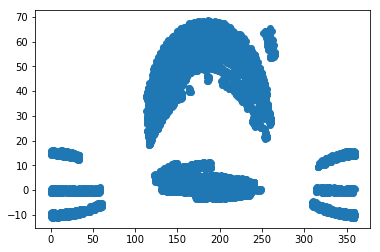

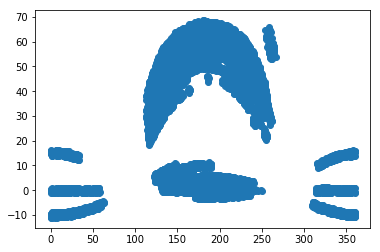

In [50]:
# print RR1.npairs, RR2.npairs
# print ED1.npairs, ED2.npairs
# print len(randsr)
fig2=plt.figure()
plt.plot(data['ra'],data['dec'],'o')
plt.show()

fig3=plt.figure()
plt.plot(rands['ra'],rands['dec'],'o')
plt.show()

[ 0.1709   0.2137   0.21815 ...,  0.27797  0.06655  0.22147] 7936


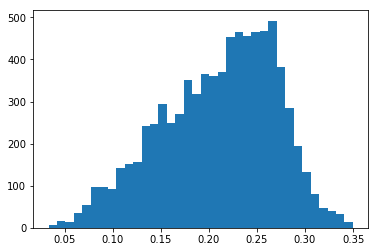

In [9]:
plt.figure()
plt.hist(data['z'],bins='auto')
print data['z'], len(data['z'])
plt.show()